In [2]:
# in Section 2 , under zomato capstone project

# Q1: How do you load the Zomato dataset into a Pandas Data Frame, and which Pandas 
# method provides basic information about the dataset?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

zomato = pd.read_csv("zomato.csv")

# checking the head
zomato.head()

# checking the shape, how many rows and columns
zomato.shape

(9551, 21)

In [3]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Q2: Identify missing values in the Zomato dataset using a Pandas method. How can you 
# count the number of missing values for each column?


# checking the nulls if any and their count
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Q3: What Pandas method provides summary statistics for numerical columns in the Zomato 
# dataset, and what insights can you derive from these statistics

# checking the summary
zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [8]:
# Q4: How do you identify categorical columns in the Zomato dataset, and why is it useful to 
# iterate through these columns?

categorical_columns = zomato.select_dtypes(include=['object', 'category']).columns.tolist()
# Additionally, if some integer columns represent categories
int_columns = zomato.select_dtypes(include=['int64']).columns.tolist()
for col in int_columns:
    if zomato[col].nunique() < 10:  # Assuming a small number of unique values implies categorical nature
        categorical_columns.append(col)


In [9]:
for col in categorical_columns:
    zomato[col].fillna(zomato[col].mode()[0], inplace=True)  # Fill missing values with mode
    #zomato[col] = zomato[col].str.lower().str.strip()  # Standardize text


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    zomato[col] = le.fit_transform(zomato[col])
    label_encoders[col] = le

In [11]:
for col in categorical_columns:
    print(zomato[col].value_counts())

Restaurant Name
1099    83
2099    79
6106    63
2717    51
4077    48
        ..
4653     1
3264     1
3025     1
3001     1
7240     1
Name: count, Length: 7446, dtype: int64
City
88     5473
50     1118
89     1080
43      251
48       25
       ... 
93        1
78        1
77        1
71        1
133       1
Name: count, Length: 141, dtype: int64
Address
4527    11
7486    11
5312    10
8649     9
4333     8
        ..
1301     1
1552     1
4505     1
5368     1
4258     1
Name: count, Length: 8918, dtype: int64
Locality
216    122
835     99
971     87
274     86
639     85
      ... 
587      1
736      1
764      1
796      1
670      1
Name: count, Length: 1208, dtype: int64
Locality Verbose
222     122
848      99
1024     87
280      86
805      85
       ... 
851       1
981       1
988       1
1109      1
681       1
Name: count, Length: 1265, dtype: int64
Cuisines
1306    945
1329    511
497     354
828     354
1514    334
       ... 
225       1
1548      1
599       1
20

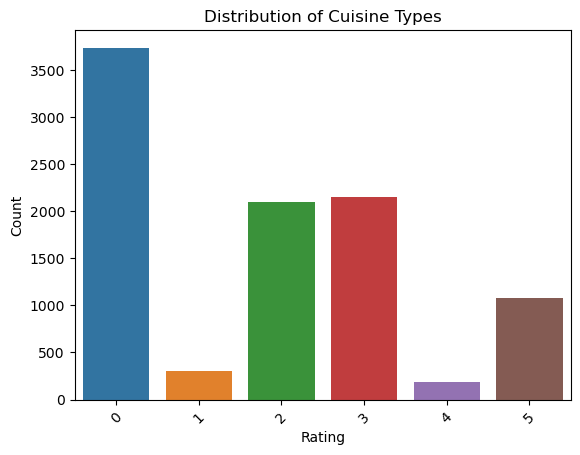

In [12]:
# Q5: Create a Seaborn plot to visualize the distribution of cuisine types. Which Seaborn 
# function is suitable, and what insights can be gained?


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column 'cuisine_type'
sns.countplot(x='Rating text', data=zomato)
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.title('Distribution of Cuisine Types')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


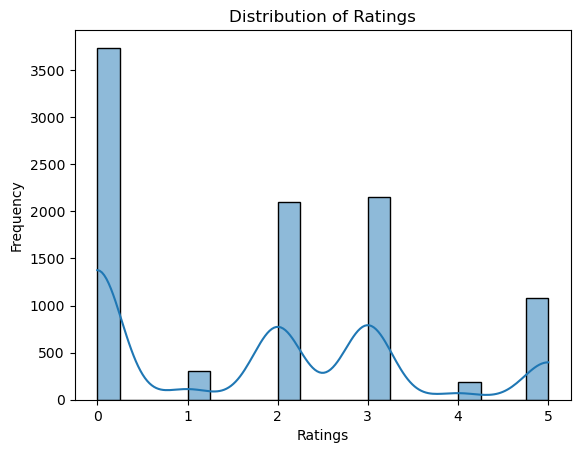

In [13]:
# Q6: Visualize the distribution of restaurant ratings using a Seaborn plot. What insights can 
# you gather from this visualization?

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column 'ratings'
sns.histplot(data=zomato, x='Rating text', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

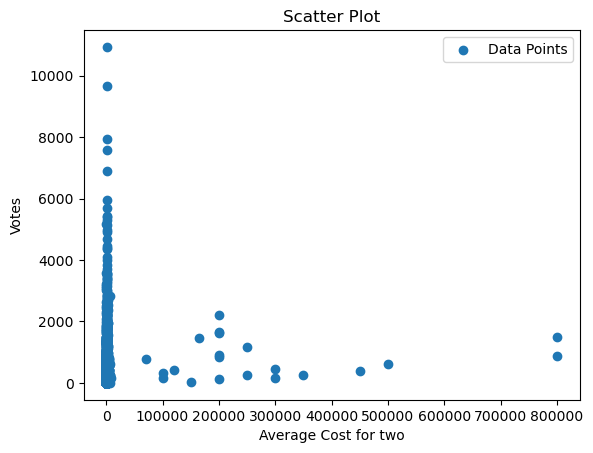

In [14]:
# Q7: Create any plot of choice to explore the relationship between two numerical columns. 
# Which Seaborn function is appropriate, and what does the scatter plot reveal?

import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

x = df['Average Cost for two']
y = df['Votes']

# creating scatter plot
plt.scatter(x,y, label = 'Data Points')

# customizing the scatter plot
plt.xlabel("Average Cost for two")
plt.ylabel("Votes")
plt.title("Scatter Plot")

# adding legend, inorder to show the text "Data Points"
plt.legend()

# Display the plot
plt.show()

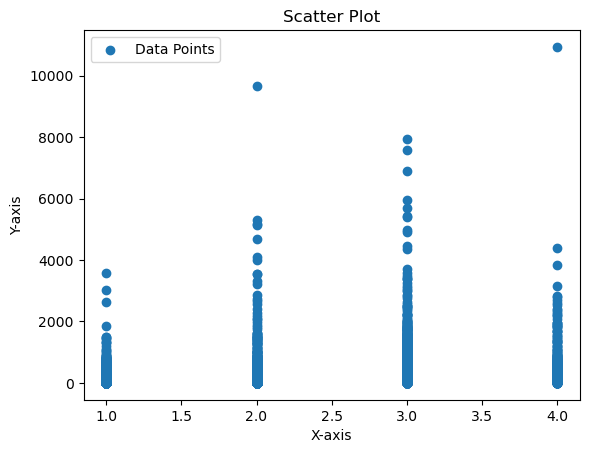

In [15]:

import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

x = df['Price range']
y = df['Votes']

# creating scatter plot
plt.scatter(x,y, label = 'Data Points')

# customizing the scatter plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# adding legend, inorder to show the text "Data Points"
plt.legend()

# Display the plot
plt.show()

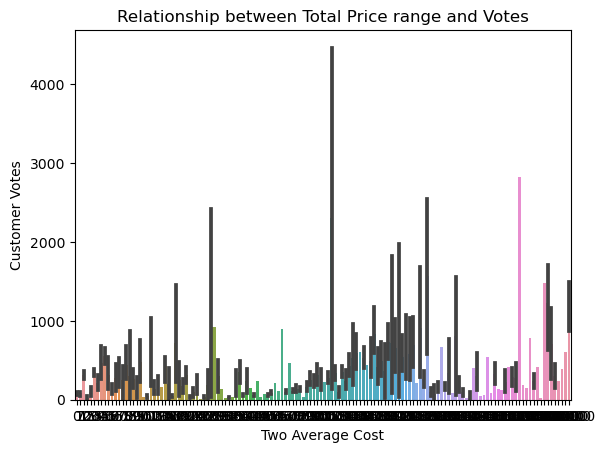

In [16]:
# Q8: Introduce a different type of visualization. What Seaborn or Matplotlib function can be 
# used

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

# Assuming df is your DataFrame with columns 'cuisine_type' and 'average_rating'
sns.barplot(x='Average Cost for two', y='Votes', data=df)
plt.title('Relationship between Total Price range and Votes')
plt.xlabel('Two Average Cost')
plt.ylabel('Customer Votes')
plt.show()

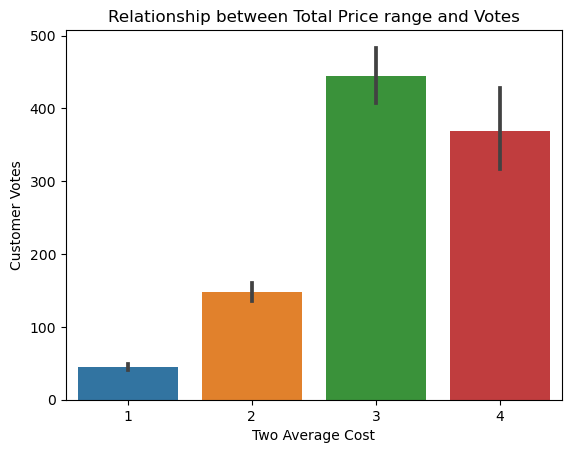

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

# Assuming df is your DataFrame with columns 'cuisine_type' and 'average_rating'
sns.barplot(x='Price range', y='Votes', data=df)
plt.title('Relationship between Total Price range and Votes')
plt.xlabel('Two Average Cost')
plt.ylabel('Customer Votes')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


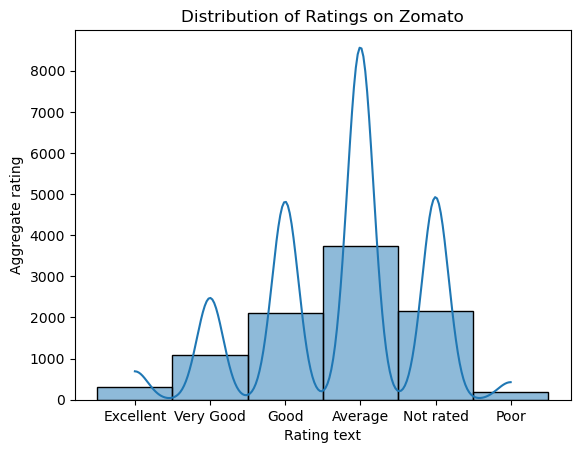

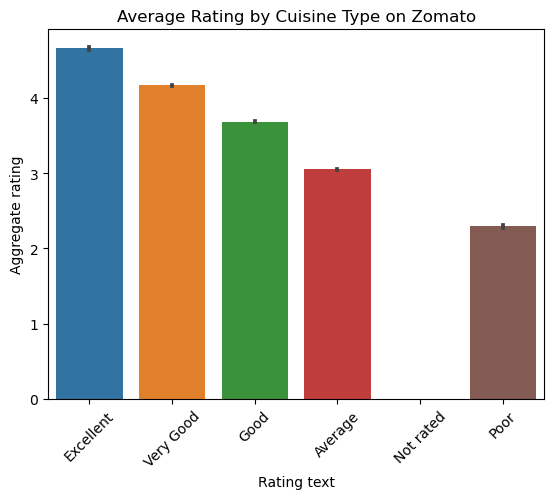

In [18]:
# Q9: How can you display the generated plots for the Zomato dataset, and which Matplotlib 
# function should be used


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

#if you want to create a histogram of numerical ratings this is best
sns.histplot(data=df, x='Rating text', bins=20, kde=True)
plt.title('Distribution of Ratings on Zomato')
plt.xlabel('Rating text')
plt.ylabel('Aggregate rating')
plt.show()

#if you prefer a bar plot to show average ratings by cuisine type:
sns.barplot(x='Rating text', y='Aggregate rating', data=df)
plt.xticks(rotation=45)
plt.title('Average Rating by Cuisine Type on Zomato')
plt.xlabel('Rating text')
plt.ylabel('Aggregate rating')
plt.show()

In [21]:
# Q10: Based on the visualizations of the Zomato dataset, what conclusions or 
# recommendations can be made? Look for patterns, trends, or interesting observations


# Conclusions and Recommendations
# New Menu i.e. Popular Cuisines and Dishes: more efforts on promoting popular cuisines and dishes.
# Pricing = pricing should be based on the restaurant and its location, so that it can generate good and regular flow of 
# customers
# offers and promotions 
# Optimizing all knids of Operations During Peak Times: allocating human resources and other necessary resources, according 
# to the peak time i.e. demand and supply.